In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# k = number of clusters

class K_means:
    def __init__(self , data , k):
        
        if k <= 0: raise Exception(f"cannot have number of clusters equal to {k}")
        
        self.k           = k
        self.data        = np.array(data)
        
        self.rows_number = self.data.shape[0]
        self.cols_number = self.data.shape[1]
        
        self.curr_means  = np.zeros((self.k , self.cols_number))
        self.prev_means  = np.zeros((self.k , self.cols_number))
        
        self.labels = None
        
        
        
        
    
    
    def initializeMeansRandomly(self):
        means = np.random.random((self.k,2))
        for i in range(self.cols_number):
            means[:,i] = means[:,i]*np.max(self.data[:,i])
        return means
    
    def isMeansMoves(self , epsilon=0.01):
        return ( np.linalg.norm(self.curr_means - self.prev_means) ) > epsilon
    
    def calculateDistanceBetweenPointsAndClustersMeans(self , points , centroids):
        if(points.shape[1] != 2) : raise Exception(f"wrong point {points}")
        
        number_of_points    = points.shape[0]
        number_of_centroids = centroids.shape[0]
        distances           = np.zeros((number_of_points, number_of_centroids))
        
        for p_indx in range(number_of_points):
            for c_indx in range(number_of_centroids):
                distances[p_indx , c_indx] = np.linalg.norm((points[p_indx] - centroids[c_indx]))
        
        return distances
    
    
    def updateClusters(self):
        distances = self.calculateDistanceBetweenPointsAndClustersMeans(self.data , self.curr_means)
        arg = np.argmin(distances , axis=1)
        return arg.reshape(self.rows_number , 1)
        
        
    def calculateMeansFromData(self , labels):
        labeled_data = np.concatenate((self.data , labels) , axis=1)
        sums         = np.zeros((self.k , self.cols_number))
        counts       = np.zeros((self.k , 1))
        for i in range(self.rows_number):
            sums  [int(labeled_data[i,2]) , 0] += labeled_data[i,0]
            sums  [int(labeled_data[i,2]) , 1] += labeled_data[i,1]
            counts[int(labeled_data[i,2]) , 0] += 1
            

        for i in range(self.k):
            sums[i , :] /= counts[i]
  
        return sums


    
    def fit(self):
        self.curr_means = self.initializeMeansRandomly()

        while self.isMeansMoves(0.1):
            self.labels     = self.updateClusters()
            self.calculateMeansFromData(self.labels)
            self.prev_means = self.curr_means
            self.curr_means = self.calculateMeansFromData(self.labels)
        
        
       

    def label(self , point):
        x = self.calculateDistanceBetweenPointsAndClustersMeans(point , self.curr_means)
        return np.argmin(x)
        
        
    def show(self):
        plt.figure(figsize=(x*2 , x))
        plt.scatter(m.curr_means[:,0] ,m.curr_means[:,1] , marker = "D"  , s = 400 , c=list(range(self.k)))        
        plt.scatter(self.data[:,0] ,self.data[:,1] , c=self.labels)
        plt.show()
        





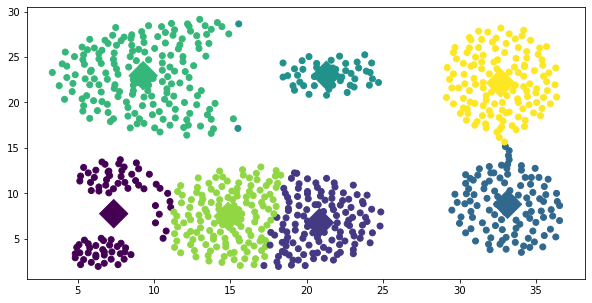

In [87]:

data = np.array(pd.read_csv("k_means_clustering_test_1.csv"))
m = K_means(data , 7)
m.fit()
m.show()

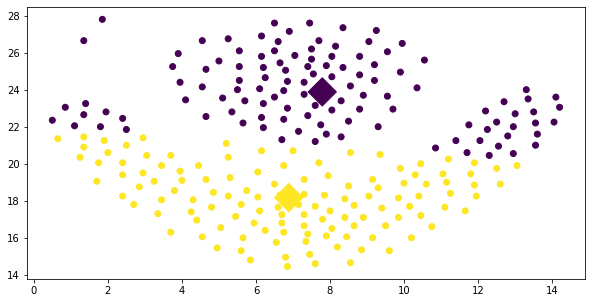

In [88]:

data = np.array(pd.read_csv("flame.csv"))
m = K_means(data , 2)
m.fit()
m.show()


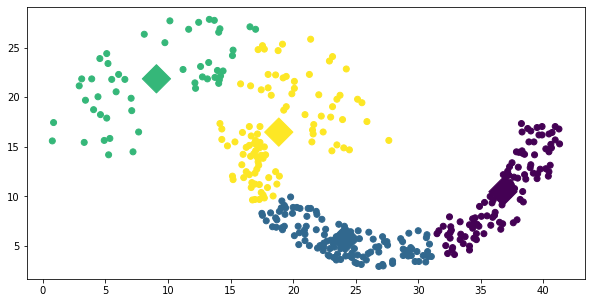

In [90]:

data = np.array(pd.read_csv("Jain.csv"))
m = K_means(data , 4)
m.fit()
m.show()


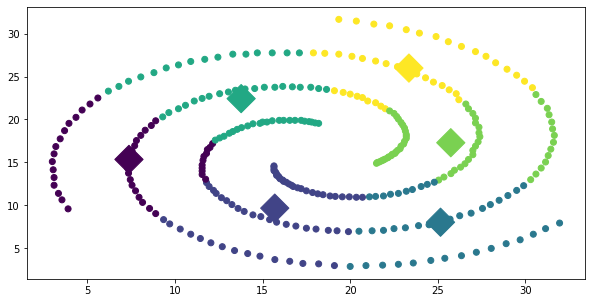

In [94]:
data = np.array(pd.read_csv("Spiral.csv"))
m = K_means(data , 6)
m.fit()
m.show()



<ipython-input-85-8edeaf47ff58>:64: RuntimeWarning: invalid value encountered in true_divide
  sums[i , :] /= counts[i]


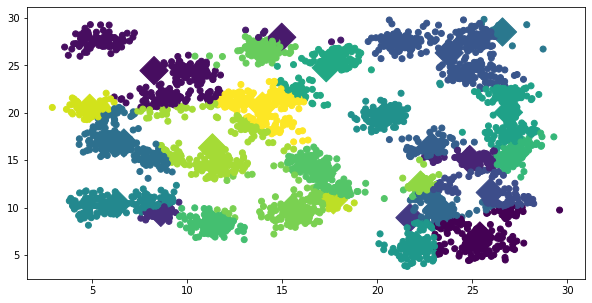

In [97]:
data = np.array(pd.read_csv("K31.csv"))
m = K_means(data , 31)
m.fit()
m.show()
